#### Simple binary movie review classification 

In [1]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=6000) #6k most freq occuring words

In [3]:
max([max(sequence) for sequence in train_data]) # longest seq

5999

In [4]:
# Set spesific indices of an all-zero matrix to 1s
def vectorize_sequences(sequences, dimension=6000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [5]:
# Vectorize data
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
X_val = X_train[:3000]
X_train = X_train[3000:]
y_val = y_train[:3000]
y_train = y_train[3000:]

**Network architecture**

- *```Intermediate layers```*: Here we define two 16-dimensional intermediate layers (hidden units). 


- *```Last layer```*: Because this is a binary problem, we'll use sigmoid function in the last layer as it will output a scalar prediction regarding the sentiment of the current review.


- *```Loss function```*: Again, because this is a binary problem and the output of the network is a probability, it is best to use *binary_crossentropy* loss. Here, we could also use mean squared error, but the binary crossentropy loss is more feasible as we deal with a model that outputs probabilitites. 

In [7]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(6000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_data=(X_val,y_val))

Train on 22000 samples, validate on 3000 samples
Epoch 1/20
22000/22000 [==============================] - 6s 264us/step - loss: 0.5054 - accuracy: 0.8008 - val_loss: 0.3832 - val_accuracy: 0.8600
Epoch 2/20
22000/22000 [==============================] - 6s 254us/step - loss: 0.3009 - accuracy: 0.8937 - val_loss: 0.2970 - val_accuracy: 0.8790
Epoch 3/20
22000/22000 [==============================] - 5s 247us/step - loss: 0.2349 - accuracy: 0.9146 - val_loss: 0.2770 - val_accuracy: 0.8887
Epoch 4/20
22000/22000 [==============================] - 6s 259us/step - loss: 0.2018 - accuracy: 0.9258 - val_loss: 0.2776 - val_accuracy: 0.8877
Epoch 5/20
22000/22000 [==============================] - 6s 264us/step - loss: 0.1793 - accuracy: 0.9339 - val_loss: 0.3057 - val_accuracy: 0.8760
Epoch 6/20
22000/22000 [==============================] - 5s 244us/step - loss: 0.1660 - accuracy: 0.9400 - val_loss: 0.3041 - val_accuracy: 0.8830
Epoch 7/20
22000/22000 [==============================] - 5s 23

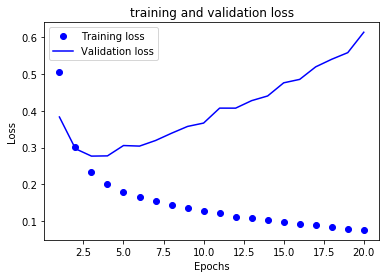

In [9]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

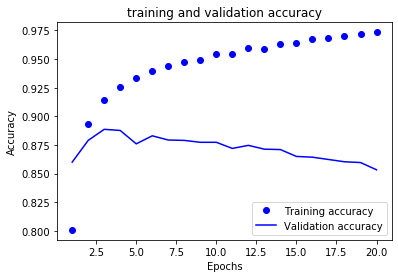

In [10]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

There is clear overfittingas the validation loss is not exponentially nor linearily decreasing function. After about four epochs the network starts to overoptimize the training data and it ends up learning representations that are spesific to itself, therefore not generalizing well on validation data. Here, decreasing the amount of epochs can help to reduce the overfitting.

In [11]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(6000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=4, batch_size=256)
results = model.evaluate(X_val, y_val)
results

Epoch 1/4
22000/22000 [==============================] - 9s 402us/step - loss: 0.4024 - accuracy: 0.8389
Epoch 2/4
22000/22000 [==============================] - 9s 391us/step - loss: 0.2428 - accuracy: 0.9097
Epoch 3/4
22000/22000 [==============================] - 8s 382us/step - loss: 0.2017 - accuracy: 0.9230
Epoch 4/4
3000/3000 [==============================] - 2s 527us/step


[0.3011767933368683, 0.8849999904632568]

A fairly naive approach gives us an accuracy of $\approx$ ```0.88%```